In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 256
#matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['lines.linewidth'] = 2
#matplotlib.rcParams['font.family'] = 'sans-serif'
import pandas as pd
%matplotlib inline
#%matplotlib notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
#import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 600
#matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['lines.linewidth'] = 1.5
#matplotlib.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.linewidth"] = 2.0
plt.rcParams["axes.labelsize"] = 26
from matplotlib.ticker import FuncFormatter
%matplotlib inline
#%matplotlib notebook

import statsmodels.api as sm

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib notebook

In [4]:
rpath='/xspace/zt9/RPMD_MD_argon_reference/md-tutorial/LJ/result'

# classical MD 

# 1- init configure

In [6]:
inputfile = '%s/classicalMD/Ar_N108/Ar108_eq_0.dat' %(rpath)
xyz=np.loadtxt(inputfile,unpack=True,usecols=[0])
x=[]
y=[]
z=[]
for i in range(108):
    x.append(xyz[i])
for i in range(108):
    y.append(xyz[i+108])
for i in range(108):
    z.append(xyz[i+108*2])

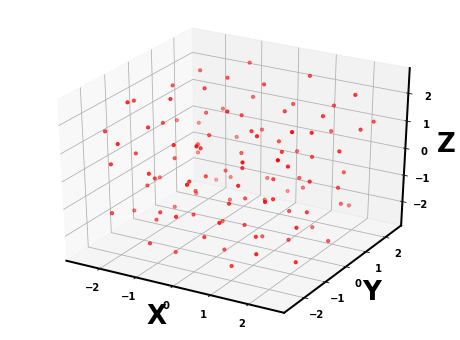

In [8]:
plt.figure(1, figsize=(8, 6))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, c='r',marker='o',s=10) 
ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

## 2. Ar, N=108

In [9]:
filename = '%s/classicalMD/Ar_N108/Energy_N108_eq_0.dat' %(rpath)
df1 = pd.read_csv(filename)
df1.head(3)

,KE,PE,Etot
0,155.063152,-552.548038,-397.484886
1,157.574833,-555.016597,-397.441764
2,160.727915,-558.368351,-397.640437


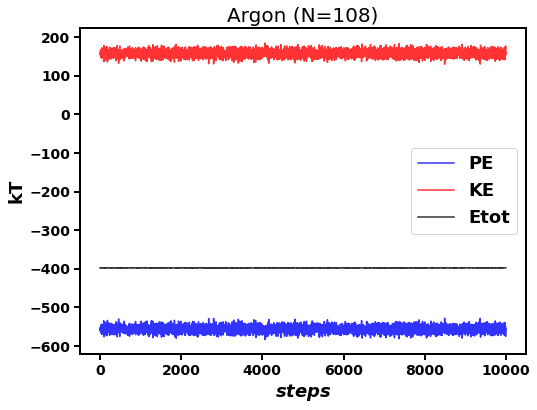

In [10]:
plt.figure(1, figsize=(8, 6))
plt.plot(df1.PE, color='b', label='PE', alpha=0.8)
plt.plot(df1.KE, color='r',label='KE', alpha=0.8)
plt.plot(df1.Etot, color='k',label='Etot', alpha=0.8)
#plt.plot(df1.T, color='b', label='PE', alpha=0.8)
plt.legend(fontsize=18,loc='best')
plt.title("Argon (N=108)",fontsize=20)
plt.xlabel(r'$steps$', fontsize=18)
plt.ylabel(r'kT', fontsize=18)
plt.tick_params(labelsize=14, length=6, width=2)
plt.show()

## 2. Ar, N=64 

In [11]:
filename = '%s/classicalMD/Ar_N64/Energy_N64_eq_0.dat' %(rpath)
df1 = pd.read_csv(filename)
df1.head(3)

,KE,PE,Etot
0,88.480568,-301.386036,-212.905468
1,84.797047,-297.984359,-213.187311
2,86.756548,-300.017529,-213.260980


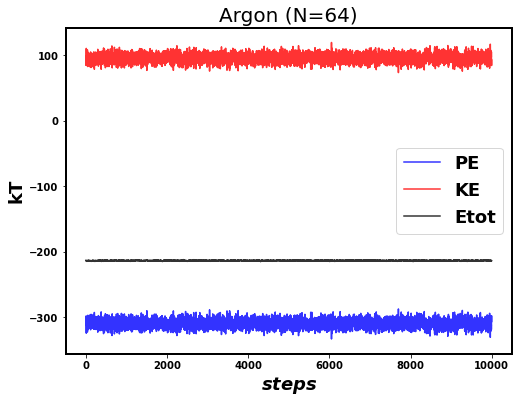

In [12]:
plt.figure(1, figsize=(8, 6))
plt.plot(df1.PE, color='b', label='PE', alpha=0.8)
plt.plot(df1.KE, color='r',label='KE', alpha=0.8)
plt.plot(df1.Etot, color='k',label='Etot', alpha=0.8)
#plt.plot(df1.T, color='b', label='PE', alpha=0.8)
plt.legend(fontsize=18,loc='best')
plt.title("Argon (N=64)",fontsize=20)
plt.xlabel(r'$steps$', fontsize=18)
plt.ylabel(r'kT', fontsize=18)
plt.show()

## RDF

In [14]:
inputfile = '%s/classicalMD/Ar_N108/Ar_N108_RDF_0.dat' % (rpath)
d1=np.loadtxt(inputfile,unpack=True,usecols=[0])
dr = 0.0128248196001  #bin width, dr = L/2.0/MAXBIN = pow(N/rho, 1.0/3.0)
r1 = [dr*i for i in range(d1.shape[0])]

inputfile = '%s/classicalMD/Ar_N64/Ar_N64_RDF_0.dat' % (rpath)
d2=np.loadtxt(inputfile,unpack=True,usecols=[0])
dr = 0.0107721734502
r2 = [dr*i for i in range(d2.shape[0])]

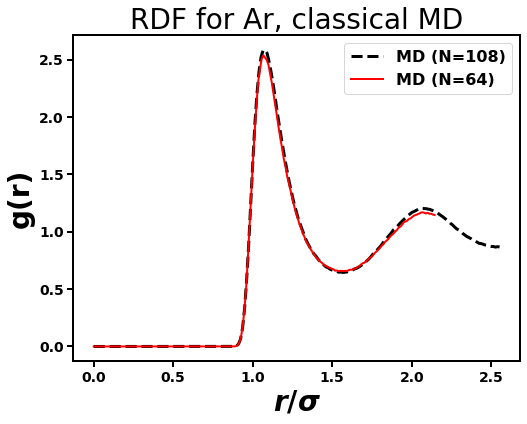

In [18]:
plt.figure(1, figsize=(8, 6))
plt.plot(r1,d1,'k--',lw=3,label='MD (N=108)')
plt.plot(r2,d2,color='r',lw=2,label='MD (N=64)')
plt.legend(fontsize=16)
plt.title("RDF for Ar, classical MD", fontsize=28)
plt.xlabel(r'$r / \sigma$', fontsize=28)
plt.ylabel(r'g(r)', fontsize=28)
#plt.xlim(1.0,1.2)
plt.tick_params(labelsize=14, length=6, width=2)
plt.show()

## Cvv

In [19]:
inputfile = '%s/classicalMD/Ar_N108/Ar_N108_Cvv_0.dat' % (rpath)
c1=np.loadtxt(inputfile,unpack=True,usecols=[0])
dr = 0.0025*10  #bin width
t1 = [dr*i for i in range(c1.shape[0])]

inputfile = '%s/classicalMD/Ar_N64/Ar_N64_Cvv_0.dat' % (rpath)
c2=np.loadtxt(inputfile,unpack=True,usecols=[0])
dr = 0.0025*10  #bin width
t2 = [dr*i for i in range(c2.shape[0])]


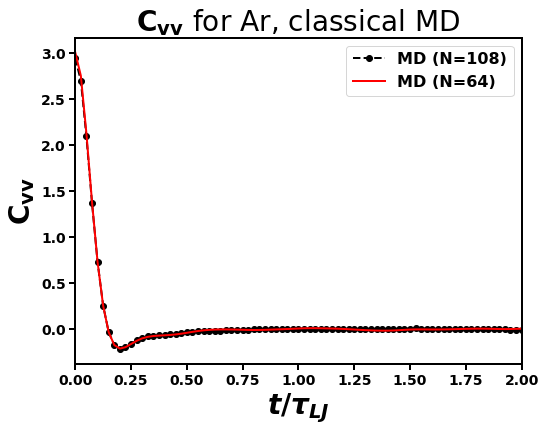

In [20]:
plt.figure(1, figsize=(8, 6))
plt.plot(t1,c1, 'ko--',lw=2,label='MD (N=108)')
plt.plot(t2,c2, color='r',lw=2,label='MD (N=64)')
plt.legend(fontsize=16)
plt.title(r"$\rm C_{vv}$ for Ar, classical MD", fontsize=28)
plt.xlabel(r'$t / \tau_{LJ}$', fontsize=28)
plt.ylabel(r'$\rm C_{vv}$', fontsize=28)
plt.xlim(0,2)
plt.tick_params(labelsize=14, length=6, width=2)
plt.show()

# RPMD, Ar (N=108, P=8)

##  1. scaling kT

In [22]:

filename = '%s/RPMD/Ar_N108_P8/prep/RPMD8_energies.dat' %(rpath)
df1 = pd.read_csv(filename)
df1.head(3)

,beta,kT,KE,SprPE,PE,TotE,Ethr
0,0.070303,14.224092,18434.423,5342.3132,-4467.9185,19308.818,-13431.258
1,0.073444,13.615724,17645.978,8876.5162,-2334.2819,24188.212,-18309.834
2,0.078862,12.680335,16433.715,9273.1256,-1838.7632,23868.077,-17987.468


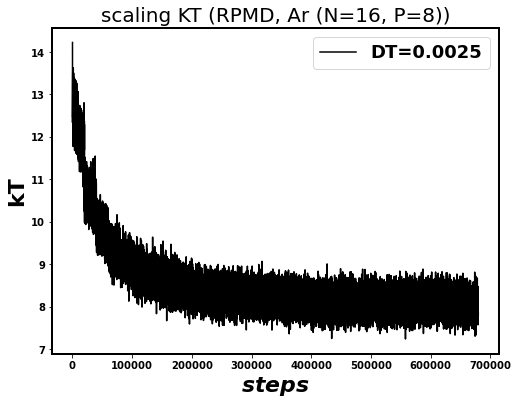

In [23]:
dt=10  #steps
t = [dt*i for i in range(df1.shape[0])]
plt.figure(1, figsize=(8, 6))
plt.plot(t,df1.kT, color='black', label='DT=0.0025')

plt.legend(fontsize=18,loc='best')
plt.title("scaling KT (RPMD, Ar (N=16, P=8))",fontsize=20)
plt.xlabel(r'$steps$', fontsize=22)
plt.ylabel(r'kT', fontsize=22)
plt.show()

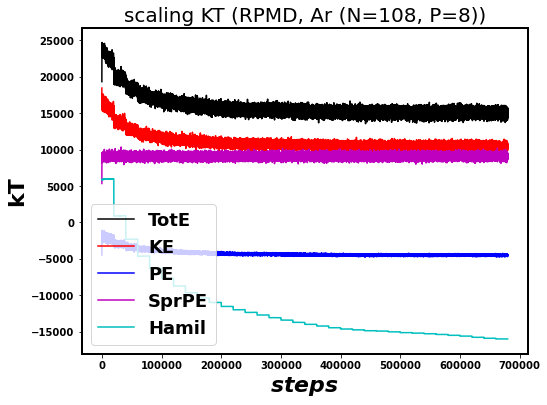

In [25]:
dt=10  #steps
t = [dt*i for i in range(df1.shape[0])]
plt.figure(1, figsize=(8, 6))
plt.plot(t, df1['TotE'], color='k', label='TotE')
plt.plot(t, df1['KE'], color='r', label='KE')
plt.plot(t, df1['PE'], color='b', label='PE')
plt.plot(t, df1['SprPE'], color='m', label='SprPE')
plt.plot(t, df1['Ethr']+df1['TotE'], color='c', label='Hamil')
plt.legend(fontsize=18)
plt.title("scaling KT (RPMD, Ar (N=108, P=8))",fontsize=20)
plt.xlabel(r'$steps$', fontsize=22)
plt.ylabel(r'kT', fontsize=22)
plt.show()

## 2. relax

In [26]:
filename = '%s/RPMD/Ar_N108_P8/prep/RPMD8_energies_eq.dat' %(rpath)
df1 = pd.read_csv(filename)
df1.head(3)

,beta,kT,KE,SprPE,PE,TotE,Ethr,Rg,bd0,bd1,bd2,bd3,bd4,bd5,bd6,bd7,endl
0,0.117174,8.534338,11060.502,8705.5702,-4544.9787,15221.094,-201.434650,0.000211,0,0.000275,0.000482,0.000603,0.000655,0.000603,0.000482,0.000275,
1,0.127408,7.848831,10172.085,9015.9680,-4521.4076,14666.646,353.277860,0.000223,0,0.000285,0.000504,0.000649,0.000689,0.000649,0.000504,0.000285,
2,0.124046,8.061511,10447.718,9040.7178,-4405.3265,15083.110,-62.771426,0.000212,0,0.000286,0.000494,0.000603,0.000627,0.000603,0.000494,0.000286,


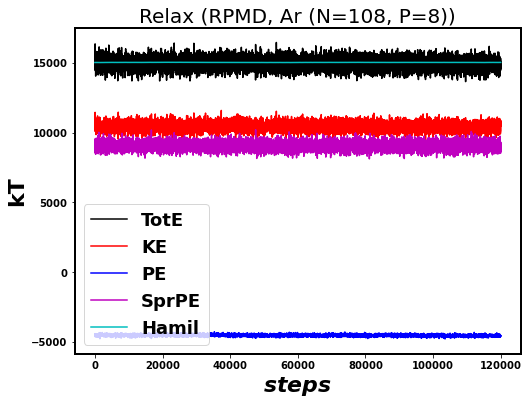

In [27]:
dt=10  #steps
t = [dt*i for i in range(df1.shape[0])]
plt.figure(1, figsize=(8, 6))
plt.plot(t, df1['TotE'], color='k', label='TotE')
plt.plot(t, df1['KE'], color='r', label='KE')
plt.plot(t, df1['PE'], color='b', label='PE')
plt.plot(t, df1['SprPE'], color='m', label='SprPE')
plt.plot(t, df1['Ethr']+df1['TotE'], color='c', label='Hamil')
plt.legend(fontsize=18)
plt.title("Relax (RPMD, Ar (N=108, P=8))",fontsize=20)
plt.xlabel(r'$steps$', fontsize=22)
plt.ylabel(r'kT', fontsize=22)
plt.show()

## 3. Equilibrium traj

In [32]:
filename = '%s/RPMD/Ar_N108_P8/traj/RPMD8_LJ_108_STATIS_0.dat' %(rpath)
df1 = pd.read_csv(filename)
df1.head(3)

,beta,kT,KEvirial,KE,SprPE,PE,TotE,Ethr,Rg,bd0,bd1,bd2,bd3,bd4,bd5,bd6,bd7,Unnamed: 17
0,0.126294,7.918026,164.99878,10261.762,8866.4839,-4638.2288,14490.017,-480.05989,0.000209,0,0.000280,0.000484,0.000591,0.000627,0.000591,0.000484,0.000280,
1,0.126213,7.923093,165.27134,10268.328,8957.9225,-4633.1077,14593.143,-583.26660,0.000217,0,0.000283,0.000493,0.000626,0.000674,0.000626,0.000493,0.000283,
2,0.125754,7.952045,165.65811,10305.850,8777.1553,-4512.6917,14570.314,-560.13860,0.000210,0,0.000278,0.000473,0.000606,0.000650,0.000606,0.000473,0.000278,


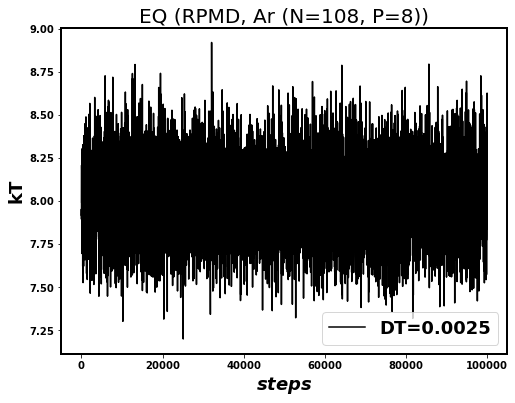

In [33]:
dt=10  #steps
t = [dt*i for i in range(df1.shape[0])]
plt.figure(1, figsize=(8, 6))
plt.plot(t,df1.kT, color='black', label='DT=0.0025')

plt.legend(fontsize=18,loc='best')
plt.title("EQ (RPMD, Ar (N=108, P=8))",fontsize=20)
plt.xlabel(r'$steps$', fontsize=18)
plt.ylabel(r'kT', fontsize=18)
plt.show()

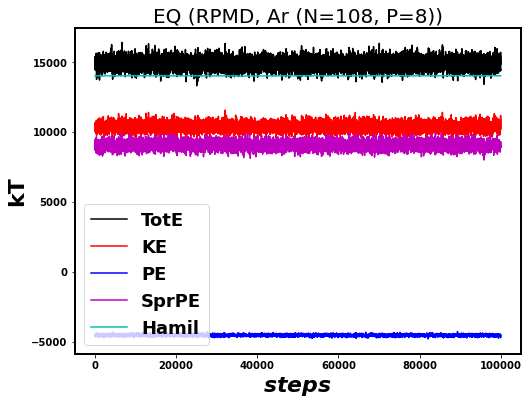

In [35]:
dt=10  #steps
t = [dt*i for i in range(df1.shape[0])]
plt.figure(1, figsize=(8, 6))
plt.plot(t, df1['TotE'], color='k', label='TotE')
plt.plot(t, df1['KE'], color='r', label='KE')
plt.plot(t, df1['PE'], color='b', label='PE')
plt.plot(t, df1['SprPE'], color='m', label='SprPE')
plt.plot(t, df1['Ethr']+df1['TotE'], color='c', label='Hamil')
plt.legend(fontsize=18)
plt.title("EQ (RPMD, Ar (N=108, P=8))",fontsize=20)
plt.xlabel(r'$steps$', fontsize=22)
plt.ylabel(r'kT', fontsize=22)
plt.show()

## RDF

In [36]:
inputfile = '%s/RPMD/Ar_N108_P8/traj/RPMD8_LJ_108_RDF_0.dat' % (rpath)
d3=np.loadtxt(inputfile,unpack=True,usecols=[0])
dr = 0.0128248196001  #bin width, dr = L/2.0/MAXBIN = pow(N/rho, 1.0/3.0)
r3 = [dr*i for i in range(d3.shape[0])]


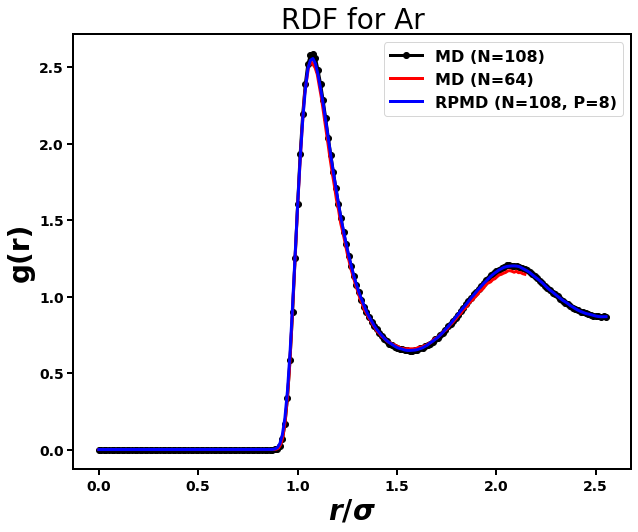

In [41]:
plt.figure(1, figsize=(10, 8))
plt.plot(r1,d1, 'ko-',lw=3,label='MD (N=108)')
plt.plot(r2,d2, color='r',lw=3,label='MD (N=64)')

plt.plot(r3,d3, 'b-',lw=3,label='RPMD (N=108, P=8)')

plt.legend(fontsize=16)
plt.title("RDF for Ar", fontsize=28)
plt.xlabel(r'$r / \sigma$', fontsize=28)
plt.ylabel(r'g(r)', fontsize=28)
#plt.xlim(1.0,1.2)
plt.tick_params(labelsize=14, length=6, width=2)
plt.show()

## Cvv

In [42]:

inputfile = '%s/RPMD/Ar_N108_P8/traj/RPMD8_LJ_108_Cvv_0.dat' % (rpath)
c3=np.loadtxt(inputfile,unpack=True,usecols=[0])
dr = 0.0025*10
t3 = [dr*i for i in range(c3.shape[0])]


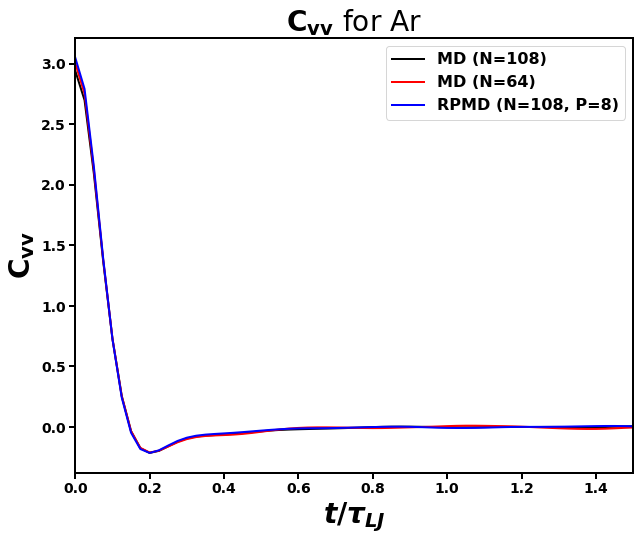

In [44]:
plt.figure(1, figsize=(10, 8))
plt.plot(t1,c1, 'k-',lw=2,label='MD (N=108)')
plt.plot(t2,c2, color='r',lw=2,label='MD (N=64)')

plt.plot(t3,c3, 'b-',lw=2,label='RPMD (N=108, P=8)')

plt.legend(fontsize=16)
plt.title(r"$\rm C_{vv}$ for Ar", fontsize=28)
plt.xlabel(r'$t / \tau_{LJ}$', fontsize=28)
plt.ylabel(r'$\rm C_{vv}$', fontsize=28)
plt.xlim(0,1.5)
plt.tick_params(labelsize=14, length=6, width=2)
plt.show()